## Business Understanding
Predicting the type  

## Data Understanding

In [74]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#loading the data
df=pd.read_excel('my_data.xlsx')
df.head()

,customer,location,soap_type,quantity,age,payment_type,Unnamed: 6,Points,Explanation/Questions
0,1,rural,single,3.0,34.0,check,NaN,NaN,Type of soap is your outcome variable
1,2,rural,single,5.0,43.0,credit card,NaN,10,Summarize the data
2,3,rural,single,7.0,91.0,credit card,NaN,10,Clean up the data set and document your actions
3,4,rural,single,5.0,91.0,check,NaN,10,Summarize the data after clean up
4,5,rural,twin,3.0,27.0,cash,NaN,10 each,Create at least four sets of visuals to descri...


In [3]:
df.tail()

,customer,location,soap_type,quantity,age,payment_type,Unnamed: 6,Points,Explanation/Questions
4995,4996,urban,liquid,9.0,20.0,check,NaN,NaN,NaN
4996,4997,urban,liquid,2.0,70.0,credit card,NaN,NaN,NaN
4997,4998,urban,liquid,1.0,21.0,check,NaN,NaN,NaN
4998,4999,urban,liquid,8.0,76.0,cash,NaN,NaN,NaN
4999,5000,urban,liquid,9.0,86.0,cash,NaN,NaN,NaN


In [4]:
df.describe()

,customer,quantity,age,Unnamed: 6
count,5000.000000,4500.000000,4500.000000,0.0
mean,2500.500000,5.524000,58.559111,NaN
std,1443.520003,2.847085,23.337637,NaN
min,1.000000,1.000000,18.000000,NaN
25%,1250.750000,3.000000,38.000000,NaN
50%,2500.500000,6.000000,58.000000,NaN
75%,3750.250000,8.000000,79.000000,NaN
max,5000.000000,10.000000,98.000000,NaN


In [5]:
df.dtypes

customer                   int64
location                  object
soap_type                 object
quantity                 float64
age                      float64
payment_type              object
Unnamed: 6               float64
Points                    object
Explanation/Questions     object
dtype: object

### Data Cleaning

In [6]:
## dropping unwanted columns
df.drop(axis=1,columns=['Unnamed: 6','Points','Explanation/Questions'],inplace=True)


In [7]:
df

,customer,location,soap_type,quantity,age,payment_type
0,1,rural,single,3.0,34.0,check
1,2,rural,single,5.0,43.0,credit card
2,3,rural,single,7.0,91.0,credit card
3,4,rural,single,5.0,91.0,check
4,5,rural,twin,3.0,27.0,cash
...,...,...,...,...,...,...
4995,4996,urban,liquid,9.0,20.0,check
4996,4997,urban,liquid,2.0,70.0,credit card
4997,4998,urban,liquid,1.0,21.0,check
4998,4999,urban,liquid,8.0,76.0,cash


df

In [8]:
# correcting

In [9]:
def data_checking(df1):
    "A function that checks for missing values and duplicates"
    print("Columns and thier mising values")
    missing=df1.isna().sum()
    print(missing)
    
    print('________')
    print('Percentage of missing values')
    perc_missing=df1.isna().sum()/len(df1)*100
    print(perc_missing)
    
    print('____________')
    print('This are the duplicates')
    
    dups=df1.duplicated().sum()
    print(dups)
    
    

In [10]:
data_checking(df)

Columns and thier mising values
customer          0
location          0
soap_type         0
quantity        500
age             500
payment_type    500
dtype: int64
________
Percentage of missing values
customer         0.0
location         0.0
soap_type        0.0
quantity        10.0
age             10.0
payment_type    10.0
dtype: float64
____________
This are the duplicates
0


In [11]:
df.head()

,customer,location,soap_type,quantity,age,payment_type
0,1,rural,single,3.0,34.0,check
1,2,rural,single,5.0,43.0,credit card
2,3,rural,single,7.0,91.0,credit card
3,4,rural,single,5.0,91.0,check
4,5,rural,twin,3.0,27.0,cash


In [12]:
#filling the quantity  missing values
mean_val=df['quantity'].mean()
df['quantity'].fillna(value=mean_val,inplace=True)

#filling the age missing values
age_val=df['age'].mean()
df['age'].fillna(value=age_val,inplace=True)

df['payment_type'].ffill(inplace=True)

In [13]:
df.isna().sum()/len(df)*100

customer        0.0
location        0.0
soap_type       0.0
quantity        0.0
age             0.0
payment_type    0.0
dtype: float64

In [14]:
df = df.astype({"quantity": int, "age": int})

In [15]:
df.dtypes

customer         int64
location        object
soap_type       object
quantity         int32
age              int32
payment_type    object
dtype: object

## Feature engineering

In [16]:
df['quantity'].value_counts()

5     931
7     496
6     474
3     472
8     455
9     452
2     443
1     433
10    428
4     416
Name: quantity, dtype: int64

In [17]:
df['age'].value_counts()

58    564
64     72
88     71
30     71
38     70
     ... 
70     44
18     44
92     42
80     39
61     38
Name: age, Length: 81, dtype: int64

In [18]:
df['payment_type'].value_counts()

credit card    1698
cash           1664
check          1638
Name: payment_type, dtype: int64

In [22]:
df1=df.copy()
df1.head()

,customer,location,soap_type,quantity,age,payment_type,age_cat
0,1,rural,single,3,34,check,Adult
1,2,rural,single,5,43,credit card,Adult
2,3,rural,single,7,91,credit card,Elderly
3,4,rural,single,5,91,check,Elderly
4,5,rural,twin,3,27,cash,Youths


In [21]:
# Binning the age
def age_cat(age):
    """A function that bins ages into different groups"""
    if age <= 19 :
        return "Teenagers"
    elif age > 19 and age <= 30 :
        return "Youths"
    elif age >30 and age <= 55 :
        return "Adult"
    else :
        return "Elderly"
    
# applying the function to create a new column
df1["age_cat"] = df1['age'].apply(age_cat)
df1.head()

,customer,location,soap_type,quantity,age,payment_type,age_cat
0,1,rural,single,3,34,check,Adult
1,2,rural,single,5,43,credit card,Adult
2,3,rural,single,7,91,credit card,Elderly
3,4,rural,single,5,91,check,Elderly
4,5,rural,twin,3,27,cash,Youths


In [24]:
# Binning the quantities
def quantities(quantity):
    """A function that bins quantities"""
    if quantity <= 3 :
        return "Low"
    elif quantity > 3 and quantity <= 6 :
        return "medium"
    else:
        return "High"
    
# Applying the function to create a new column
df1["new_quant"] = df1["quantity"].apply(quantities)
df1.head()

,customer,location,soap_type,quantity,age,payment_type,age_cat,new_quant
0,1,rural,single,3,34,check,Adult,Low
1,2,rural,single,5,43,credit card,Adult,medium
2,3,rural,single,7,91,credit card,Elderly,High
3,4,rural,single,5,91,check,Elderly,medium
4,5,rural,twin,3,27,cash,Youths,Low


## Exploratory data analysis

### Univariate Analysis

In [64]:

# checking the value counts
for column in df.columns:
    print(df[column].value_counts())

1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: customer, Length: 5000, dtype: int64
rural       2320
suburban    1530
urban       1150
Name: location, dtype: int64
single    1850
twin      1250
bundle     975
liquid     925
Name: soap_type, dtype: int64
5     931
7     496
6     474
3     472
8     455
9     452
2     443
1     433
10    428
4     416
Name: quantity, dtype: int64
58    564
64     72
88     71
30     71
38     70
     ... 
70     44
18     44
92     42
80     39
61     38
Name: age, Length: 81, dtype: int64
credit card    1698
cash           1664
check          1638
Name: payment_type, dtype: int64
Elderly      2922
Adult        1405
Youths        577
Teenagers      96
Name: age_cat, dtype: int64


In [81]:
#  Plotting a pie chart 
def pie_chart(df, column):
    """A function that plots a pie chart for a given column in a DataFrame"""
    fig, ax = plt.subplots(figsize=(10, 8))
    explode = [0.06] * len(df[column].unique())  # create explode list based on number of unique values

    df[column].value_counts().plot(kind="pie", autopct="%1.1f%%", explode=explode, ax=ax)
    ax.set_title(f"Distribution of {column}")
    plt.show()
    
# Plotting a bar graph
def bar_graph(df,column):
    """A function that plots an horizontal for a given column in a DataFrame"""
    plt.figure(figsize=(10,5))
    sns.countplot(x=column,data=df,order=df[column].value_counts().index)
    plt.title(f'{column} Distribution')
    plt.ylabel('count')
    plt.show

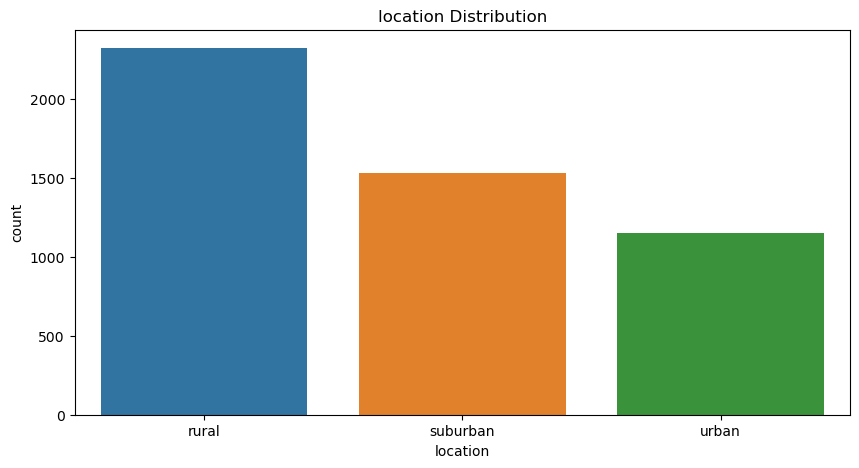